<a href="https://colab.research.google.com/github/MizanMustakim/robi_Datathon2.0_pre-assesment/blob/main/Code_TeamVanish_3z47wk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setting up the kaggle environment to load the dataset directly from kaggle**

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c robi-datathon-2-pre-assessment

 55% 9.00M/16.5M [00:00<00:00, 89.0MB/s]
100% 16.5M/16.5M [00:00<00:00, 134MB/s] 


Import Libraries

In [ ]:
import zipfile
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as tts
import tensorflow as tf

Unzip the dataset.

In [ ]:
local_zip = "/content/robi-datathon-2-pre-assessment.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/data')
zip_ref.close()

### Data Processing

Load the train & the test dataset.

In [ ]:
train_df = pd.read_csv("/content/data/train.csv")
train_df.head()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,...,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,...,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,M,Y,Y,1,D,D,B,0,1,...,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,F,Y,Y,1,D,D,B,0,1,...,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,M,N,Y,1,B,D,D,1,l,...,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0


In [ ]:
test_df = pd.read_csv("/content/data/test.csv")
test_df.head()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,M,Y,Y,1,B,D,D,0,l,...,0.026301,-9.200175,2.122970,6.646617,4.801224,1.693087,0,0,0.439270,2
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,M,Y,Y,1,B,C,B,1,l,...,0.010774,-8.897092,1.770889,11.046294,6.407230,1.516728,0,0,0.084334,4
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,M,Y,N,1,B,D,B,1,l,...,0.016837,-9.173660,1.871872,2.805834,5.481219,1.788823,0,0,0.984210,0
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,M,Y,Y,1,D,D,B,0,1,...,0.015684,-9.178200,1.675028,6.354938,5.427266,1.792147,0,0,0.003492,1
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,M,Y,Y,1,D,C,B,1,1,...,0.006406,-8.726633,1.963535,6.810158,11.487845,1.880992,0,0,0.060614,0


Merging the train & the test dataset together to encode the categorical values of both datasets.

In [ ]:
full_df = pd.concat([train_df, test_df])
full_df.head()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,...,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0.0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,...,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1.0
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,M,Y,Y,1,D,D,B,0,1,...,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0.0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,F,Y,Y,1,D,D,B,0,1,...,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0.0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,M,N,Y,1,B,D,D,1,l,...,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0.0


The shape of the combined the dataset. 

In [ ]:
full_df.shape

(113387, 36)

Checking the columns info of the train dataset.

In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113387 entries, 0 to 85064
Data columns (total 36 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      113387 non-null  object 
 1   gender  113387 non-null  object 
 2   s11     113387 non-null  object 
 3   s12     113387 non-null  object 
 4   s13     113387 non-null  int64  
 5   s16     113387 non-null  object 
 6   s17     113387 non-null  object 
 7   s18     113387 non-null  object 
 8   s48     113387 non-null  int64  
 9   s52     113387 non-null  object 
 10  s53     113387 non-null  object 
 11  s54     10371 non-null   object 
 12  s55     12627 non-null   object 
 13  s56     0 non-null       float64
 14  s57     0 non-null       float64
 15  s58     113387 non-null  object 
 16  s59     0 non-null       float64
 17  s69     113387 non-null  object 
 18  s70     113387 non-null  object 
 19  s71     113387 non-null  object 
 20  n1      113387 non-null  float64
 21  n2      113

**Feature Extracting**

From the columns info we can see that *s53*, *s54*, *s55*, *s56*, *s57*, *s59* columns donot make sense. As a result, I removed these columns from the dataset in the next cell for cleaning purpose.

***s53*** --> No value, only white spaces are given.

***s54***, ***s55*** --> There are mixed categorical values including a lot of *NaN* values.

***s56***, ***s57***, ***s59*** --> There are no *no-null* value which doesn't make sense. 

In [ ]:
X = full_df.drop(["id", "label", "s53", "s54", "s55", "s56", "s57", "s59"], axis=1)

In [ ]:
X.describe()

,s13,s48,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
count,113387.000000,113387.000000,113387.000000,113387.000000,113387.000000,113387.000000,113387.000000,113387.000000,113387.000000,113387.000000,113387.000000,113387.000000,113387.000000,113387.000000,113387.000000,113387.000000,113387.000000
mean,0.960983,0.536287,10.728898,1.667675,4.593560,4.976887,-32.604827,0.015881,-9.112285,1.635854,5.325540,6.039585,1.699806,0.010327,0.090196,0.499170,3.002769
std,0.193636,0.498684,4.601926,0.693467,2.214353,2.276387,0.238432,0.006760,0.197215,0.189840,2.165350,2.354331,0.115406,0.101098,0.286463,0.288996,2.003303
min,0.000000,0.000000,1.774084,0.296709,0.000000,1.700370,-33.167589,0.000271,-9.517986,1.169057,2.410793,1.173465,1.500006,0.000000,0.000000,0.000003,0.000000
25%,1.000000,0.000000,6.787560,1.049386,3.000000,2.619605,-32.779620,0.010491,-9.254452,1.493679,3.519583,4.445718,1.599952,0.000000,0.000000,0.248989,1.000000
50%,1.000000,1.000000,10.065412,1.516055,4.000000,4.678687,-32.575189,0.016584,-9.179368,1.554886,4.852391,5.397394,1.699382,0.000000,0.000000,0.498620,3.000000
75%,1.000000,1.000000,14.819841,2.263938,6.000000,7.202718,-32.394576,0.019933,-8.984400,1.784963,6.623489,6.633314,1.800061,0.000000,0.000000,0.749905,5.000000
max,1.000000,1.000000,21.114856,3.168021,10.000000,8.613252,-32.280779,0.030077,-8.581279,2.186357,11.269972,12.077567,1.899995,1.000000,1.000000,0.999990,6.000000


Replace the *NaN* values with 0.

In [ ]:
X = X.fillna(0)
X.head()

,gender,s11,s12,s13,s16,s17,s18,s48,s52,s58,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
0,M,Y,N,1,D,D,B,0,1,B,...,0.017176,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5
1,M,Y,Y,1,D,D,B,1,1,B,...,0.013857,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3
2,M,Y,Y,1,D,D,B,0,1,B,...,0.013943,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2
3,F,Y,Y,1,D,D,B,0,1,B,...,0.010387,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4
4,M,N,Y,1,B,D,D,1,l,B,...,0.016289,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1


Making a list of the ***object*** data type columns.

In [ ]:
object_col = [i for i in X.columns if X[i].dtypes == "O"]

**How Many categories these categorical columns have to encode???**

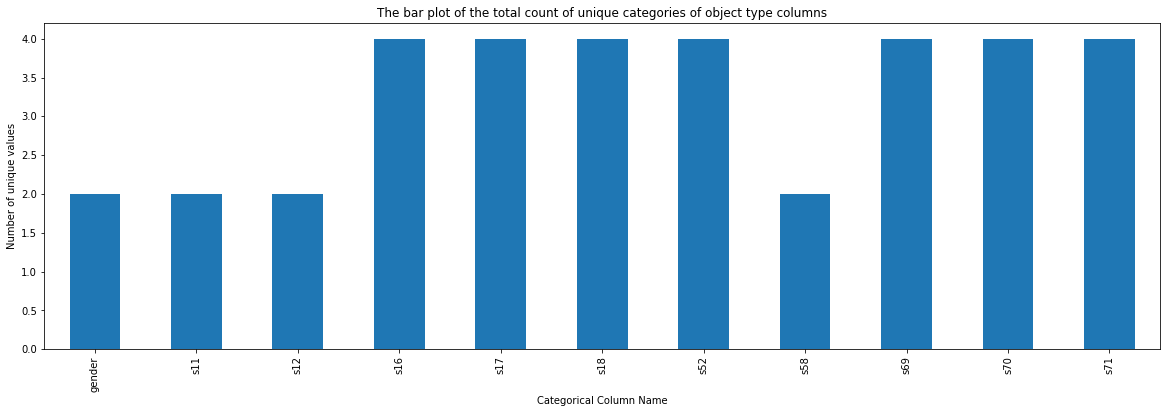

In [ ]:
plt.figure(figsize=(20,6))
X[object_col].nunique().plot(kind="bar")
plt.xlabel("Categorical Column Name")
plt.ylabel("Number of unique values")
plt.title("The bar plot of the total count of unique categories of object type columns")

plt.show()

Converting these columns to category type.

In [ ]:
X[object_col] = X[object_col].astype("category")
X[object_col].dtypes

gender    category
s11       category
s12       category
s16       category
s17       category
s18       category
s52       category
s58       category
s69       category
s70       category
s71       category
dtype: object

Now encoding these categorical values to the numerical.

In [ ]:
for i in object_col:
    X[i] = X[i].cat.codes

In [ ]:
X

,gender,s11,s12,s13,s16,s17,s18,s48,s52,s58,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
0,1,1,0,1,3,3,1,0,1,1,...,0.017176,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5
1,1,1,1,1,3,3,1,1,1,1,...,0.013857,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3
2,1,1,1,1,3,3,1,0,1,1,...,0.013943,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2
3,0,1,1,1,3,3,1,0,1,1,...,0.010387,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4
4,1,0,1,1,1,3,3,1,2,1,...,0.016289,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85060,1,1,1,1,2,2,2,1,2,1,...,0.011017,-8.994304,1.581816,9.265657,5.604845,1.746737,0,0,0.751100,0
85061,1,1,1,1,1,2,2,1,2,1,...,0.019550,-9.131275,1.526110,7.823166,5.458373,1.669676,0,0,0.903294,3
85062,1,0,1,1,3,0,2,1,1,1,...,0.015461,-9.249529,1.505547,6.438985,3.429928,1.500925,0,0,0.571895,3
85063,1,0,1,1,1,3,3,1,2,1,...,0.010612,-9.229158,1.833286,5.383311,6.212552,1.730987,0,0,0.655693,6


Separating the train and the test datasets after encoding the labels.

In [ ]:
train_input = X[:train_df.shape[0]]
test_input = X[train_df.shape[0]: ]
train_output = train_df.label

In [ ]:
train_input.head(10)

,gender,s11,s12,s13,s16,s17,s18,s48,s52,s58,...,n4,n6,n8,n9,n10,n11,n12,n13,n14,n15
0,1,1,0,1,3,3,1,0,1,1,...,2.318385,0.017176,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5
1,1,1,1,1,3,3,1,1,1,1,...,6.197768,0.013857,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3
2,1,1,1,1,3,3,1,0,1,1,...,7.824401,0.013943,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2
3,0,1,1,1,3,3,1,0,1,1,...,8.256767,0.010387,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4
4,1,0,1,1,1,3,3,1,2,1,...,2.300011,0.016289,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1
5,1,1,1,1,3,2,1,1,1,1,...,2.732090,0.008230,1.845862,10.660651,10.947018,1.568647,0,0,0.687640,6
6,1,1,1,1,1,3,1,1,2,1,...,7.378877,0.007366,1.535369,8.155031,10.947018,1.543350,0,0,0.983840,5
7,1,1,1,1,1,2,1,0,2,0,...,7.066580,0.022486,1.811164,2.822841,6.590523,1.694829,0,0,0.777798,0
8,0,1,1,1,3,3,1,0,1,1,...,8.069883,0.013593,1.510002,10.661686,10.947018,1.779480,0,0,0.557019,0
9,1,1,0,1,3,3,1,0,1,1,...,8.326920,0.012796,1.383908,2.671842,3.940305,1.716165,0,0,0.212874,1


In [ ]:
test_input.head(10)

,gender,s11,s12,s13,s16,s17,s18,s48,s52,s58,...,n4,n6,n8,n9,n10,n11,n12,n13,n14,n15
0,1,1,1,1,1,3,3,0,2,1,...,2.052415,0.026301,2.122970,6.646617,4.801224,1.693087,0,0,0.439270,2
1,1,1,1,1,1,2,1,1,2,0,...,6.928142,0.010774,1.770889,11.046294,6.407230,1.516728,0,0,0.084334,4
2,1,1,0,1,1,3,1,1,2,1,...,2.210629,0.016837,1.871872,2.805834,5.481219,1.788823,0,0,0.984210,0
3,1,1,1,1,3,3,1,0,1,1,...,2.350379,0.015684,1.675028,6.354938,5.427266,1.792147,0,0,0.003492,1
4,1,1,1,1,3,2,1,1,1,1,...,8.136887,0.006406,1.963535,6.810158,11.487845,1.880992,0,0,0.060614,0
5,1,1,1,1,3,3,1,0,1,0,...,4.871093,0.006217,1.524488,8.477102,11.503684,1.824085,0,0,0.787256,6
6,1,0,1,1,1,3,2,1,2,1,...,5.991672,0.010729,1.490601,7.347506,5.708466,1.593072,0,0,0.878133,1
7,1,1,1,1,3,3,1,1,1,1,...,6.061921,0.005381,1.718437,5.376519,10.905976,1.895801,0,0,0.769569,6
8,1,0,1,1,1,3,1,1,1,1,...,6.021687,0.009376,1.962656,6.780483,11.438956,1.847398,0,0,0.905184,2
9,1,1,0,1,1,1,3,1,2,1,...,2.467512,0.018922,1.532382,2.911209,3.701080,1.843613,0,0,0.792054,2


**Outlier cleaning**

I user *IQR* method to identify and to remove the outliers. Min and max values are calculated to identify outliers, and then the values that fall within or exceed these ranges are identified. On meeting the requirements, the values were changed to the minimum or maximum value and then back again.

In [ ]:
def outlier_clean(data):
    q3 = data.quantile(0.75)
    q1 = data.quantile(0.25)

    iqr = abs(q1 - q3)

    max = q3 + 1.5 * iqr
    min = q1 - 1.5 * iqr

    data = np.where(data > max, max, np.where(data < min, min, data))

    return data

List if the *float* data type value to clear the outliers.

In [ ]:
float_col = [i for i in train_input.columns if train_input[i].dtypes == "float64"]
float_col

['n1', 'n2', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n14']

In [ ]:
train_input[float_col].describe()

,n1,n2,n4,n5,n6,n7,n8,n9,n10,n11,n14
count,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000
mean,10.201863,1.600111,5.080537,-32.641183,0.015014,-9.107429,1.612428,5.232644,6.115109,1.699553,0.497570
std,4.414660,0.664985,2.276162,0.241453,0.006550,0.205200,0.173560,2.179705,2.474138,0.115150,0.289207
min,2.200736,0.311727,1.700370,-33.167589,0.000584,-9.517986,1.178469,2.508858,1.173465,1.500006,0.000101
25%,6.592127,1.013540,2.833161,-32.862207,0.009195,-9.258473,1.489924,3.464229,4.414671,1.600056,0.247801
50%,9.535961,1.462197,4.840320,-32.577026,0.016053,-9.174557,1.537263,4.461770,5.317154,1.698556,0.495255
75%,14.432580,2.194510,7.300738,-32.396733,0.018771,-8.964786,1.730249,6.524341,7.027610,1.799238,0.748786
max,20.882733,3.137331,8.594620,-32.289180,0.029992,-8.586583,2.173593,11.214870,12.029135,1.899995,0.999990




---


It's clear that there are two columns with negative min max values that might affect our goal prediction in the preceding data description. These negative-valued columns also don't make any sense to represent any information in this dataset. Because of this, I deleted them from our dataset in the next cell.

---



In [ ]:
train_input = train_input.drop(["n5", "n7"], axis=1)
float_col = [i for i in train_input.columns if train_input[i].dtypes == "float64"]
train_input[float_col].describe()

,n1,n2,n4,n6,n8,n9,n10,n11,n14
count,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000
mean,10.201863,1.600111,5.080537,0.015014,1.612428,5.232644,6.115109,1.699553,0.497570
std,4.414660,0.664985,2.276162,0.006550,0.173560,2.179705,2.474138,0.115150,0.289207
min,2.200736,0.311727,1.700370,0.000584,1.178469,2.508858,1.173465,1.500006,0.000101
25%,6.592127,1.013540,2.833161,0.009195,1.489924,3.464229,4.414671,1.600056,0.247801
50%,9.535961,1.462197,4.840320,0.016053,1.537263,4.461770,5.317154,1.698556,0.495255
75%,14.432580,2.194510,7.300738,0.018771,1.730249,6.524341,7.027610,1.799238,0.748786
max,20.882733,3.137331,8.594620,0.029992,2.173593,11.214870,12.029135,1.899995,0.999990




---


The view of the outliers in the box plot.

---



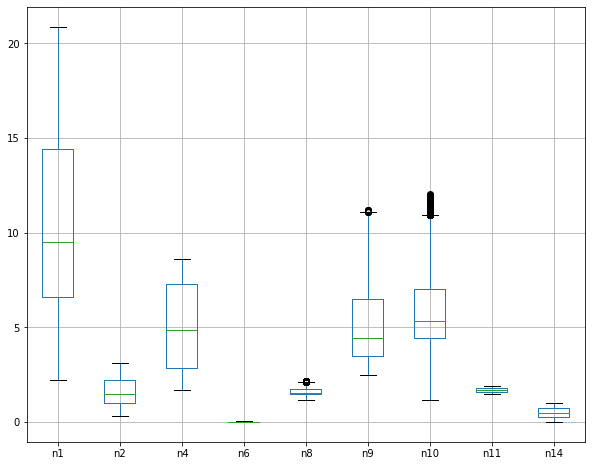

In [ ]:
plt.figure(figsize=(10,8))
train_input[float_col].boxplot()
plt.show()



---

Cleaning the outliers, and Let's look at the boxplot to see if there are any outliers.

In [ ]:
for i in float_col:
    train_input[i] = outlier_clean(train_input[i])

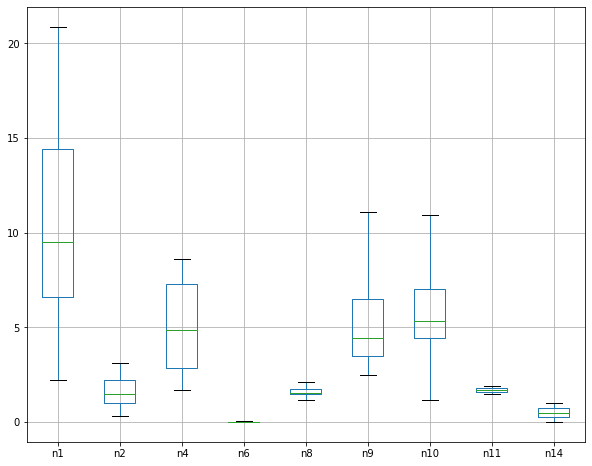

In [ ]:
plt.figure(figsize=(10,8))
train_input[float_col].boxplot()
plt.show()



---



In [ ]:
train_input[float_col].describe()

,n1,n2,n4,n6,n8,n9,n10,n11,n14
count,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000
mean,10.201863,1.600111,5.080537,0.015014,1.612011,5.232628,6.063978,1.699553,0.497570
std,4.414660,0.664985,2.276162,0.006550,0.172360,2.179662,2.365827,0.115150,0.289207
min,2.200736,0.311727,1.700370,0.000584,1.178469,2.508858,1.173465,1.500006,0.000101
25%,6.592127,1.013540,2.833161,0.009195,1.489924,3.464229,4.414671,1.600056,0.247801
50%,9.535961,1.462197,4.840320,0.016053,1.537263,4.461770,5.317154,1.698556,0.495255
75%,14.432580,2.194510,7.300738,0.018771,1.730249,6.524341,7.027610,1.799238,0.748786
max,20.882733,3.137331,8.594620,0.029992,2.090738,11.114510,10.947018,1.899995,0.999990


### Model Training

Split the train input into two part. One is the training part, and the other one is the validation part.

In [ ]:
X_train, X_test, y_train, y_test = tts(train_input, train_output, test_size=0.20, shuffle=True)

print("Shape of X_train data: ", X_train.shape)
print("Shape of X_test data: ", X_test.shape)
print("Shape of y_train data: ", y_train.shape)
print("Shape of y_test data: ", y_test.shape)

Shape of X_train data:  (22657, 26)
Shape of X_test data:  (5665, 26)
Shape of y_train data:  (22657,)
Shape of y_test data:  (5665,)


Neural Network model design and Checking the summary.

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(512, activation="tanh", input_shape=[X_train.shape[1]]),
                                    # tf.keras.layers.Dense(256, activation="tanh"),
                                    tf.keras.layers.Dense(1, activation="sigmoid")

])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 512)               13824     
                                                                 
 dense_54 (Dense)            (None, 1)                 513       
                                                                 
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________




---


Train the model.

---

In this training session, I chose the *Early Stopping* method of keras callbacks function. So that we don't end up with a model that's either over- or under-fitting.

In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = "sgd",
    metrics=[tf.keras.metrics.AUC()])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                               min_delta=0,
                               patience=2,
                               verbose=0)


# Train the Model
history = model.fit(X_train, y_train, epochs=1000, batch_size=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/1000
454/454 [==============================] - 2s 4ms/step - loss: 0.3541 - auc_18: 0.8064 - val_loss: 0.3296 - val_auc_18: 0.8491
Epoch 2/1000
454/454 [==============================] - 2s 4ms/step - loss: 0.3260 - auc_18: 0.8353 - val_loss: 0.3141 - val_auc_18: 0.8558
Epoch 3/1000
454/454 [==============================] - 2s 4ms/step - loss: 0.3220 - auc_18: 0.8428 - val_loss: 0.3462 - val_auc_18: 0.8548
Epoch 4/1000
454/454 [==============================] - 2s 4ms/step - loss: 0.3215 - auc_18: 0.8430 - val_loss: 0.3378 - val_auc_18: 0.8606
Epoch 5/1000
454/454 [==============================] - 2s 4ms/step - loss: 0.3190 - auc_18: 0.8477 - val_loss: 0.3115 - val_auc_18: 0.8620
Epoch 6/1000
454/454 [==============================] - 2s 4ms/step - loss: 0.3178 - auc_18: 0.8478 - val_loss: 0.3211 - val_auc_18: 0.8604
Epoch 7/1000
454/454 [==============================] - 2s 4ms/step - loss: 0.3181 - auc_18: 0.8479 - val_loss: 0.3142 - val_auc_18: 0.8619
Epoch 8/1000
454/454

**Test data processing and then predict them.**

In [ ]:
test_input = test_input.drop(["n5", "n7"], axis=1)

In [ ]:
Y_pred = model.predict(test_input)
Y_pred

array([[0.94825256],
       [0.90909845],
       [0.7259817 ],
       ...,
       [0.6172631 ],
       [0.93816125],
       [0.25272077]], dtype=float32)

In [ ]:
pred = []
for i in range(Y_pred.shape[0]):
    pred.append(round(Y_pred[i][0]))

Make dataframe of the predicting the data according to the id

In [ ]:
data = {"id": test_df["id"],
        "label": pred}

submission_df = pd.DataFrame(data= data)
submission_df

,id,label
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,1
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,1
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,1
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,0
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,0
...,...,...
85060,b'gAAAAABinOjbnJVk2-nOVQsYB9p4DK26fTLLik_UR2H0...,1
85061,b'gAAAAABinOi7ixyXrlKYlx8D9i0-TIPD5elP2k-vuekn...,1
85062,b'gAAAAABinOi31zWSlD0OMhbBd3_weh7Kq6aPeO4yYqns...,1
85063,b'gAAAAABinOjIe7jFVk9k7jiH8Y3rdpUHDTZG2T2isunp...,1


Save this dataframe as csv file for the submission.

In [ ]:
submission_df.to_csv("submission_12.csv", index=False)

Visualize the performance.

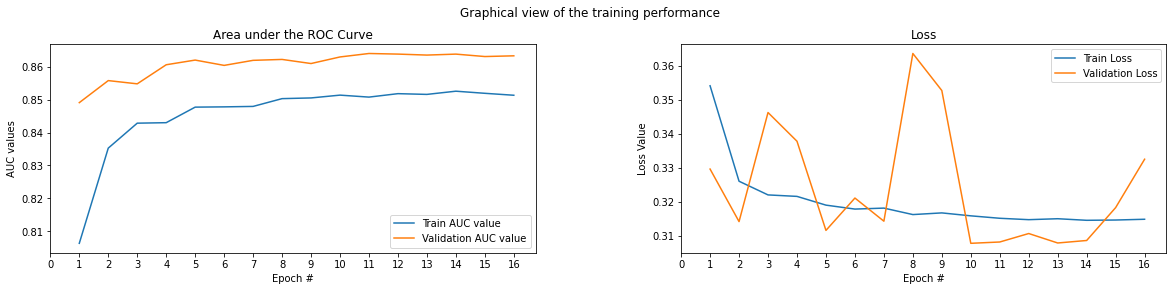

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
t = f.suptitle('Graphical view of the training performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,len(history.history["loss"])+1))
ax1.plot(epoch_list, history.history['auc_18'], label='Train AUC value')
ax1.plot(epoch_list, history.history['val_auc_18'], label='Validation AUC value')
ax1.set_xticks(np.arange(0, len(history.history["loss"])+1, 1))
ax1.set_ylabel('AUC values')
ax1.set_xlabel('Epoch #')
ax1.set_title('Area under the ROC Curve')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, len(history.history["loss"])+1, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch #')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")